In [5]:
import requests
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt

In [45]:
import requests
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt
from urllib.parse import urlparse, urljoin

def extract_links(url, main_domain):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    links = []
    for a in soup.find_all('a', href=True):
        link = a.get('href')
        if link:
            absolute_url = urljoin(url, link)
            parsed_url = urlparse(absolute_url)
            # Check if the link belongs to the main domain
            if parsed_url.netloc != main_domain:
                links.append(parsed_url.netloc)
    
    return links

def build_network(seed_url, depth, graph=None):
    if graph is None:
        graph = nx.Graph()

    if depth == 0:
        return graph

    try:
        domain = urlparse(seed_website).scheme+"://"+urlparse(seed_website).netloc
        links = extract_links(seed_url, domain)
        for link in links:
            graph.add_edge(domain, link)
            build_network(link, depth - 1, graph)
    except requests.exceptions.RequestException as e:
        print(f"Error processing {seed_url}: {e}, for domain : {urlparse(seed_url)}, for URL : {seed_url}, for depth : {depth}")

    return graph

In [35]:
urlparse(seed_website).scheme+"://"+urlparse(seed_website).netloc

'https://www.observatoirepetitesirene.org'

In [46]:
seed_website = 'https://www.observatoirepetitesirene.org'

depth_of_network = 2

network_graph = build_network(seed_website, depth_of_network)

Error processing www.observatoirepetitesirene.org: Invalid URL 'www.observatoirepetitesirene.org': No scheme supplied. Perhaps you meant https://www.observatoirepetitesirene.org?, for domain : ParseResult(scheme='', netloc='', path='www.observatoirepetitesirene.org', params='', query='', fragment=''), for URL : www.observatoirepetitesirene.org, for 1
Error processing www.observatoirepetitesirene.org: Invalid URL 'www.observatoirepetitesirene.org': No scheme supplied. Perhaps you meant https://www.observatoirepetitesirene.org?, for domain : ParseResult(scheme='', netloc='', path='www.observatoirepetitesirene.org', params='', query='', fragment=''), for URL : www.observatoirepetitesirene.org, for 1
Error processing www.observatoirepetitesirene.org: Invalid URL 'www.observatoirepetitesirene.org': No scheme supplied. Perhaps you meant https://www.observatoirepetitesirene.org?, for domain : ParseResult(scheme='', netloc='', path='www.observatoirepetitesirene.org', params='', query='', fragm

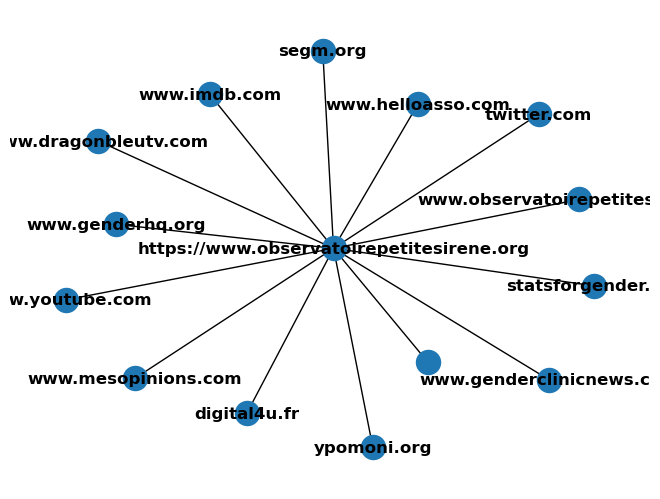

In [47]:
# Visualization (optional)
pos = nx.spring_layout(network_graph)
nx.draw(network_graph, pos, with_labels=True, font_weight='bold')
plt.show()